In [4]:
# import necessary modules 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report 

In [5]:
#reading csv for train data
data_train=pd.read_csv("train.csv")
data_train

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.60
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.90
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.80
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.50
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7002,TitleJ7TDY,Flowers-Adams PLC,Banks,192800$,1195360.0$,2020-12-07,Product_1,1734434912,100 - 500 Million,Category 4,...,CEO/Co-Founder/Chairman,clairewilliams@flowersadams.com,Call centre manager,Contact Email,Level 1,More than a week back,"Jones,Eyvette W",We have all the requirements,4,107.34
7003,TitleO1IIN,"Kelly, Smith and Benton and Sons",Hospitals/Clinics,220208$,1453372.8$,2020-03-13,Product_2,(002)106-0243x03346,100 - 500 Million,Category 1,...,CEO,vanessaanderson@kelly.com,Financial risk analyst,Marketing Event,Level 2,?,"Brown,Maxine A",We have all the requirements,3,26.35
7004,TitleF1FWY,Romero-Juarez PLC,Semiconductors,253608$,NaN,2020-03-10,Product_1,777-231-4109x712,100 - 500 Million,Category 2,...,SVP/General Counsel,nicholasduncan@romerojuarez.com,Nature conservation officer,Marketing Event,Level 3,NaN,"Logan,Kevin N",NaN,1,70.60
7005,TitleXVBNJ,"Sullivan, Mooney and Elliott LLC",Banks,118615$,794720.5$,2019-12-26,Product_1,001-212-631-5467x377,500 Million - 1 Billion,Category 2,...,Executive Vice President,waynewilliams@sullivan.com,"Designer, textile",Website,Level 3,NaN,"Cashin,Marc C",We have all the requirements,3,-5.00


In [6]:
#Checking For Null Values if any Present
data_train.isnull().sum()

Deal_title                 0
Lead_name                  0
Industry                   1
Deal_value                51
Weighted_amount          525
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Fund_category              0
Geography                972
Location                  11
POC_name                   8
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Last_lead_update         633
Internal_POC               0
Resource                 149
Internal_rating            0
Success_probability        0
dtype: int64

In [7]:
#removing extra special characters from columns for performing operations and coverting object to int or float according to convienence
data_train['Deal_value'] = data_train['Deal_value'].str.replace('$', '')
data_train['Weighted_amount'] = data_train['Weighted_amount'].str.replace('$', '')
data_train['Deal_value']=data_train['Deal_value'].astype('float')
data_train['Weighted_amount']=data_train['Weighted_amount'].astype('float')
data_train.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506.0,2067263.7,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488.0,240876.8,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392.0,2407926.4,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774.0,468321.4,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896.0,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [8]:
#filling  Numerical null values by mean
data_train['Deal_value'] = data_train['Deal_value'].fillna((data_train['Deal_value'].mean()))
data_train['Weighted_amount'] = data_train['Weighted_amount'].fillna((data_train['Weighted_amount'].mean()))
data_train['Internal_rating'] = data_train['Internal_rating'].fillna((data_train['Internal_rating'].mean()))
data_train['Success_probability'] = data_train['Success_probability'].fillna((data_train['Success_probability'].mean()))
data_train.head()
#filling non numerical null values by most occuring one
df_most_common_imputed = data_train.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_most_common_imputed

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506.0,2.067264e+06,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",No,3,73.60
1,TitleKIW18,Bender PLC LLC,Construction Services,39488.0,2.408768e+05,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.90
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392.0,2.407926e+06,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.80
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774.0,4.683214e+05,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.50
4,Title904GV,Lee and Sons PLC,Financial Services,483896.0,1.569884e+06,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7002,TitleJ7TDY,Flowers-Adams PLC,Banks,192800.0,1.195360e+06,2020-12-07,Product_1,1734434912,100 - 500 Million,Category 4,...,CEO/Co-Founder/Chairman,clairewilliams@flowersadams.com,Call centre manager,Contact Email,Level 1,More than a week back,"Jones,Eyvette W",We have all the requirements,4,107.34
7003,TitleO1IIN,"Kelly, Smith and Benton and Sons",Hospitals/Clinics,220208.0,1.453373e+06,2020-03-13,Product_2,(002)106-0243x03346,100 - 500 Million,Category 1,...,CEO,vanessaanderson@kelly.com,Financial risk analyst,Marketing Event,Level 2,?,"Brown,Maxine A",We have all the requirements,3,26.35
7004,TitleF1FWY,Romero-Juarez PLC,Semiconductors,253608.0,1.569884e+06,2020-03-10,Product_1,777-231-4109x712,100 - 500 Million,Category 2,...,SVP/General Counsel,nicholasduncan@romerojuarez.com,Nature conservation officer,Marketing Event,Level 3,Following up but lead not responding,"Logan,Kevin N",No,1,70.60
7005,TitleXVBNJ,"Sullivan, Mooney and Elliott LLC",Banks,118615.0,7.947205e+05,2019-12-26,Product_1,001-212-631-5467x377,500 Million - 1 Billion,Category 2,...,Executive Vice President,waynewilliams@sullivan.com,"Designer, textile",Website,Level 3,Following up but lead not responding,"Cashin,Marc C",We have all the requirements,3,-5.00


In [9]:
#encoding object data type to which it can be fitted to model
import pandas as pd
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df_most_common_imputed.columns:
    if df_most_common_imputed[column_name].dtype == object:
        df_most_common_imputed[column_name] = le.fit_transform(df_most_common_imputed[column_name])
    else:
        pass
#Selecting best featues according to importance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df_most_common_imputed[df_most_common_imputed < 0] = 0
X = df_most_common_imputed.iloc[:,0:]  
y = df_most_common_imputed.iloc[:,-1] 

y=y.astype('int')
bestfeatures = SelectKBest(score_func=chi2, k=23)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(23,'Score')) 
df_most_common_imputed

                 Features         Score
4         Weighted_amount  1.420386e+08
3              Deal_value  1.364706e+07
12               POC_name  1.704079e+06
0              Deal_title  5.015557e+04
1               Lead_name  3.661222e+04
22    Success_probability  3.403307e+04
7              Contact_no  3.255084e+04
14         Lead_POC_email  3.185313e+04
11               Location  4.239087e+03
15  Hiring_candidate_role  3.532348e+03
5        Date_of_creation  2.776079e+03
10              Geography  1.009553e+03
2                Industry  9.258454e+02
21        Internal_rating  7.254207e+02
17       Level_of_meeting  6.724351e+02
9           Fund_category  4.324964e+02
16            Lead_source  2.336974e+02
19           Internal_POC  1.638316e+02
8            Lead_revenue  9.644649e+01
13            Designation  8.680526e+01
20               Resource  5.072472e+01
18       Last_lead_update  4.127089e+01
6                   Pitch  1.694784e+01


,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,4326,1386,119,320506.0,2.067264e+06,453,1,5706,1,1,...,7,1132,126,3,2,7,12,2,3,73.60
1,3979,411,31,39488.0,2.408768e+05,190,1,6624,2,3,...,4,6500,501,2,0,3,5,2,5,58.90
2,3081,940,56,359392.0,2.407926e+06,207,0,5490,2,3,...,8,552,286,1,0,2,18,2,4,68.80
3,4966,1943,114,76774.0,4.683214e+05,760,1,1007,2,2,...,2,2282,611,0,1,3,5,4,1,64.50
4,1739,3477,46,483896.0,1.569884e+06,141,1,3604,1,2,...,7,5082,369,3,1,9,53,2,4,62.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7002,3702,1791,17,192800.0,1.195360e+06,706,0,4312,0,3,...,2,1412,77,0,0,6,30,4,4,107.34
7003,4652,3270,56,220208.0,1.453373e+06,437,1,1,0,0,...,0,6788,250,1,1,2,5,4,3,26.35
7004,2896,5413,130,253608.0,1.569884e+06,434,0,6273,0,1,...,8,5218,395,1,2,4,35,2,1,70.60
7005,6594,6042,17,118615.0,7.947205e+05,359,0,2865,2,1,...,7,6873,166,3,2,4,8,4,3,0.00


In [10]:
#drop other columns other than top 5-6 selected
df_most_common_imputed.drop(["Deal_title","Lead_name","Date_of_creation","Designation","Pitch","Industry","Deal_value","Contact_no","Location","POC_name","Lead_POC_email","Lead_revenue","Resource","Hiring_candidate_role","Last_lead_update","Internal_POC"], axis=1, inplace=True)

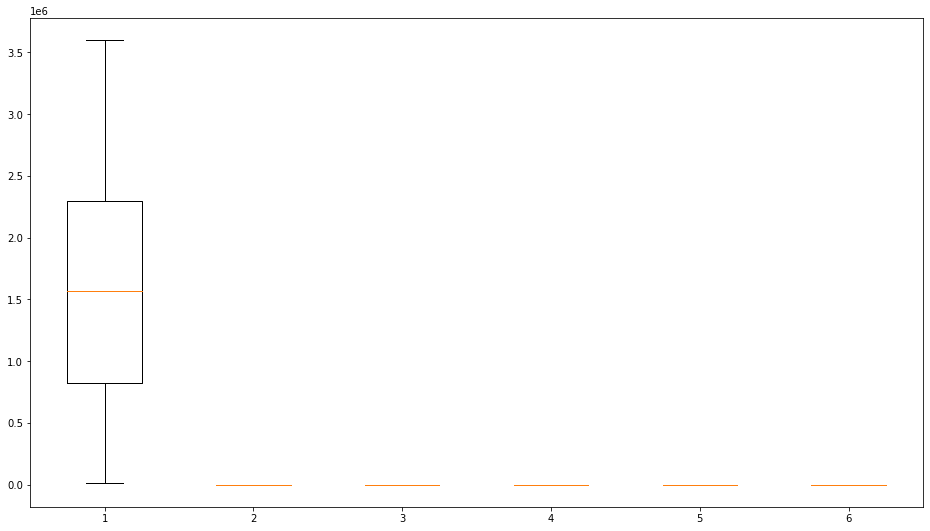

In [11]:
#BOXPLOT FOR OUTLIAR DETECTION ON TRAINING DATA
a=df_most_common_imputed['Weighted_amount']
b=df_most_common_imputed['Fund_category']
c=df_most_common_imputed['Geography']
d=df_most_common_imputed['Lead_source']
e=df_most_common_imputed['Level_of_meeting']
f=df_most_common_imputed['Internal_rating']
to_plot=[a,b,c,d,e,f]
fig=plt.figure(1,figsize=(16,9))
ax=fig.add_subplot(111)
bp=ax.boxplot(to_plot)

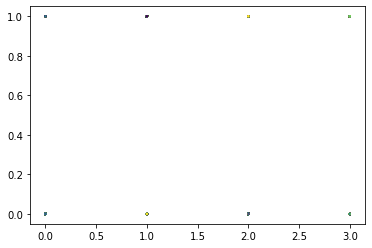

In [12]:
 #ScatterPLOT FOR OUTLIAR DETECTION ON TRAINING DATA
plt.scatter(b,c,e,f,alpha=1)

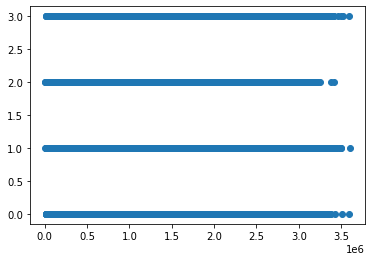

In [13]:
#ScatterPLOT FOR OUTLIAR DETECTION ON TRAINING DATA
plt.scatter(a,d,alpha=1)

In [14]:
#removing Outliars from training data
df_most_common_imputed
import pandas as pd
from scipy import stats
z_scores = stats.zscore(df_most_common_imputed)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df_most_common_imputed[filtered_entries]
new_df

,Weighted_amount,Fund_category,Geography,Lead_source,Level_of_meeting,Internal_rating,Success_probability
0,2.067264e+06,1,1,3,2,3,73.60
1,2.408768e+05,3,0,2,0,5,58.90
2,2.407926e+06,3,1,1,0,4,68.80
3,4.683214e+05,2,1,0,1,1,64.50
4,1.569884e+06,2,0,3,1,4,62.40
...,...,...,...,...,...,...,...
7001,2.685430e+06,2,0,2,1,2,57.40
7002,1.195360e+06,3,1,0,0,4,107.34
7003,1.453373e+06,0,1,1,1,3,26.35
7004,1.569884e+06,1,1,1,2,1,70.60


In [15]:
#reading csv for test data
data_test=pd.read_csv("test.csv")
data_test.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,TitleAD16O,Bonilla Ltd Inc,Investment Bank/Brokerage,200988$,NaN,2020-04-15,Product_1,167.332.2751x989,100 - 500 Million,Category 4,...,sonia,Chairman/CEO/President,maureenthomas@bonilla.com,"Designer, fashion/clothing",Marketing Event,Level 1,more than a month,"Massiah,Gerard F",No,-1.0
1,TitleOW6CR,"Williams, Rogers and Roach PLC",Electronics,409961$,2541758.2$,2021-01-23,Product_1,001-486-903-0711x7831,100 - 500 Million,Category 3,...,Daniel Bell,CEO/Co-Founder/Chairman,danielbell@williams.com,Horticultural consultant,Marketing Event,Level 2,Up-to-date,"Smith,Keenan H",Yes,1.0
2,TitleVVJQ5,"Wood, Vaughn and Morales Ltd",Banks,434433$,3041031.0$,2020-07-19,Product_1,(393)104-2610x9723,100 - 500 Million,Category 1,...,Andrew Davis,Chairman/Chief Innovation Officer,andrewdavis@wood.com,Information officer,Marketing Event,Level 2,Did not hear back after Level 1,"Gilley,Janine",Deliverable,5.0
3,TitleUS8NA,Durham-Crawford Inc,Music,218952$,1521716.4$,2020-02-27,Product_2,(817)040-4599,100 - 500 Million,Category 1,...,shital,CEO/Chairman/President,charlesrivera@durhamcrawford.com,Commercial/residential surveyor,Contact Email,Level 3,more than a month,"Morsy,Omar A",No,5.0
4,Title5VGWW,"Simpson, Duncan and Long LLC",Real Estate,392835$,2455218.75$,2020-10-25,Product_1,718-032-5726x76098,500 Million - 1 Billion,Category 3,...,Shelly Stephenson,CEO/Co-Founder/Chairman,shellystephenson@simpson.com,Wellsite geologist,Others,Level 3,More than 2 weeks,"Morsy,Omar A",Deliverable,2.0


In [16]:
#Checking For Null Values if any Present
data_test.isnull().sum()

Deal_title                 0
Lead_name                  0
Industry                   1
Deal_value                 5
Weighted_amount           60
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Fund_category              0
Geography                 79
Location                   3
POC_name                   2
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Last_lead_update         168
Internal_POC               0
Resource                  14
Internal_rating            0
dtype: int64

In [17]:
#removing extra special characters from columns for performing operations and coverting object to int or float according to convienence
data_test['Deal_value'] = data_test['Deal_value'].str.replace('$', '')
data_test['Weighted_amount'] = data_test['Weighted_amount'].str.replace('$', '')
data_test['Deal_value']=data_test['Deal_value'].astype('float')
data_test['Weighted_amount']=data_test['Weighted_amount'].astype('float')
data_test.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,TitleAD16O,Bonilla Ltd Inc,Investment Bank/Brokerage,200988.0,NaN,2020-04-15,Product_1,167.332.2751x989,100 - 500 Million,Category 4,...,sonia,Chairman/CEO/President,maureenthomas@bonilla.com,"Designer, fashion/clothing",Marketing Event,Level 1,more than a month,"Massiah,Gerard F",No,-1.0
1,TitleOW6CR,"Williams, Rogers and Roach PLC",Electronics,409961.0,2541758.20,2021-01-23,Product_1,001-486-903-0711x7831,100 - 500 Million,Category 3,...,Daniel Bell,CEO/Co-Founder/Chairman,danielbell@williams.com,Horticultural consultant,Marketing Event,Level 2,Up-to-date,"Smith,Keenan H",Yes,1.0
2,TitleVVJQ5,"Wood, Vaughn and Morales Ltd",Banks,434433.0,3041031.00,2020-07-19,Product_1,(393)104-2610x9723,100 - 500 Million,Category 1,...,Andrew Davis,Chairman/Chief Innovation Officer,andrewdavis@wood.com,Information officer,Marketing Event,Level 2,Did not hear back after Level 1,"Gilley,Janine",Deliverable,5.0
3,TitleUS8NA,Durham-Crawford Inc,Music,218952.0,1521716.40,2020-02-27,Product_2,(817)040-4599,100 - 500 Million,Category 1,...,shital,CEO/Chairman/President,charlesrivera@durhamcrawford.com,Commercial/residential surveyor,Contact Email,Level 3,more than a month,"Morsy,Omar A",No,5.0
4,Title5VGWW,"Simpson, Duncan and Long LLC",Real Estate,392835.0,2455218.75,2020-10-25,Product_1,718-032-5726x76098,500 Million - 1 Billion,Category 3,...,Shelly Stephenson,CEO/Co-Founder/Chairman,shellystephenson@simpson.com,Wellsite geologist,Others,Level 3,More than 2 weeks,"Morsy,Omar A",Deliverable,2.0


In [18]:
#filling  Numerical null values by mean
data_test['Deal_value'] = data_test['Deal_value'].fillna((data_test['Deal_value'].mean()))
data_test['Weighted_amount'] = data_test['Weighted_amount'].fillna((data_test['Weighted_amount'].mean()))
data_test['Internal_rating'] = data_test['Internal_rating'].fillna((data_test['Internal_rating'].mean()))
data_test.head()
#filling non numerical null values by most occuring one
dt_most_common_imputed = data_test.apply(lambda x: x.fillna(x.value_counts().index[0]))
dt_most_common_imputed


,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,TitleAD16O,Bonilla Ltd Inc,Investment Bank/Brokerage,200988.0,1.556917e+06,2020-04-15,Product_1,167.332.2751x989,100 - 500 Million,Category 4,...,sonia,Chairman/CEO/President,maureenthomas@bonilla.com,"Designer, fashion/clothing",Marketing Event,Level 1,more than a month,"Massiah,Gerard F",No,-1.0
1,TitleOW6CR,"Williams, Rogers and Roach PLC",Electronics,409961.0,2.541758e+06,2021-01-23,Product_1,001-486-903-0711x7831,100 - 500 Million,Category 3,...,Daniel Bell,CEO/Co-Founder/Chairman,danielbell@williams.com,Horticultural consultant,Marketing Event,Level 2,Up-to-date,"Smith,Keenan H",Yes,1.0
2,TitleVVJQ5,"Wood, Vaughn and Morales Ltd",Banks,434433.0,3.041031e+06,2020-07-19,Product_1,(393)104-2610x9723,100 - 500 Million,Category 1,...,Andrew Davis,Chairman/Chief Innovation Officer,andrewdavis@wood.com,Information officer,Marketing Event,Level 2,Did not hear back after Level 1,"Gilley,Janine",Deliverable,5.0
3,TitleUS8NA,Durham-Crawford Inc,Music,218952.0,1.521716e+06,2020-02-27,Product_2,(817)040-4599,100 - 500 Million,Category 1,...,shital,CEO/Chairman/President,charlesrivera@durhamcrawford.com,Commercial/residential surveyor,Contact Email,Level 3,more than a month,"Morsy,Omar A",No,5.0
4,Title5VGWW,"Simpson, Duncan and Long LLC",Real Estate,392835.0,2.455219e+06,2020-10-25,Product_1,718-032-5726x76098,500 Million - 1 Billion,Category 3,...,Shelly Stephenson,CEO/Co-Founder/Chairman,shellystephenson@simpson.com,Wellsite geologist,Others,Level 3,More than 2 weeks,"Morsy,Omar A",Deliverable,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,Title2R8VU,"Phillips, Smith and Jones Inc",BioTech/Drugs,417150.0,2.732332e+06,2020-11-25,Product_2,(444)658-6350x207,100 - 500 Million,Category 3,...,William Spears,Chairman/CEO/President,williamspears@phillips.com,Community development worker,Marketing Event,Level 3,No track,"Ross,Eric L",No,1.0
2089,Title7HCNJ,Elliott-Morales PLC,Real Estate,488661.0,2.956399e+06,2019-10-20,Product_2,1377254815,50 - 100 Million,Category 3,...,Amy Page,Chief Executive Officer,amypage@elliottmorales.com,Forest/woodland manager,Others,Level 2,Following up but lead not responding,"Abdul-Hamid,Saud Muhamad",Cannot deliver,5.0
2090,TitleCD5YZ,Herrera-Santos PLC,Sales/Marketing Services,421119.0,2.631994e+06,2019-03-23,Product_1,695-757-3607x5834,50 - 100 Million,Category 1,...,ashma,CEO/Co-Founder/Chairman,markcombs@herrerasantos.com,Actuary,Contact Email,Level 1,?,"Bannister,Joan",Deliverable,5.0
2091,Title8OKXL,"Howard, Martinez and Jacobs PLC",Banks,59879.0,3.502922e+05,2019-02-05,Product_1,+1-688-318-4079x644,50 - 100 Million,Category 2,...,aarti,Chief Executive Officer,justinmorgan@howard.com,"Designer, textile",Marketing Event,Level 1,2 days back,"Murray,Younetta",We have all the requirements,5.0


In [19]:
#drop other columns other than top 5-6 selected above
dt_most_common_imputed.drop(["Deal_title","Lead_name","Contact_no","Deal_value","Date_of_creation","Designation","Pitch","Industry","Location","POC_name","Lead_POC_email","Lead_revenue","Resource","Hiring_candidate_role","Last_lead_update","Internal_POC"], axis=1, inplace=True)

In [20]:
#encoding object data type to which it can be fitted to model
import pandas as pd
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in dt_most_common_imputed.columns:
    if dt_most_common_imputed[column_name].dtype == object:
        dt_most_common_imputed[column_name] = le.fit_transform(dt_most_common_imputed[column_name])
    else:
        pass
for column_name in df_most_common_imputed.columns:
    if df_most_common_imputed[column_name].dtype == object:
        df_most_common_imputed[column_name] = le.fit_transform(df_most_common_imputed[column_name])
    else:
        pass
#splitting data for training and testing
x_train = new_df.iloc[:,0:-1]  
y_train = new_df.iloc[:,-1] 
x_test=   dt_most_common_imputed
x_train
x_test

,Weighted_amount,Fund_category,Geography,Lead_source,Level_of_meeting,Internal_rating
0,1.556917e+06,3,0,1,0,-1.0
1,2.541758e+06,2,1,1,1,1.0
2,3.041031e+06,0,1,1,1,5.0
3,1.521716e+06,0,0,0,2,5.0
4,2.455219e+06,2,1,2,2,2.0
...,...,...,...,...,...,...
2088,2.732332e+06,2,1,1,2,1.0
2089,2.956399e+06,2,1,2,1,5.0
2090,2.631994e+06,0,0,0,0,5.0
2091,3.502922e+05,1,0,1,0,5.0


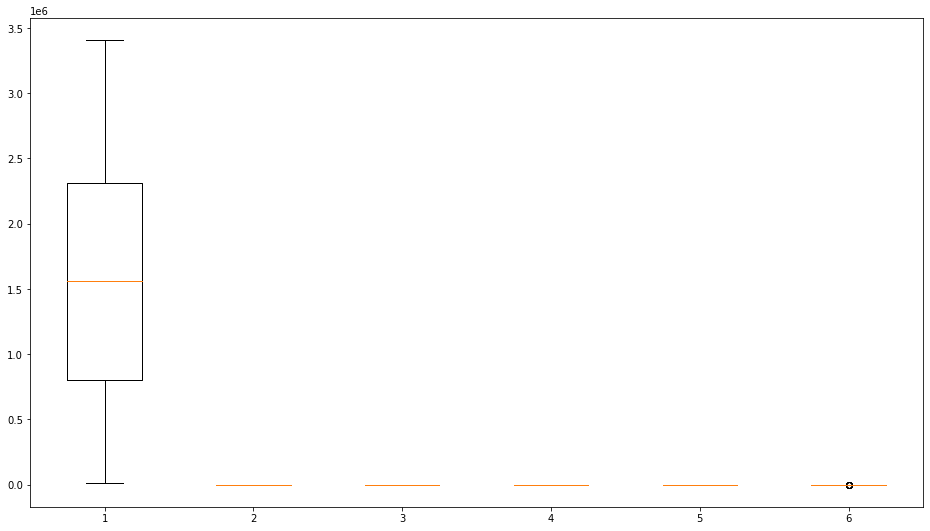

In [21]:
#BOXPLOT FOR OUTLIAR DETECTION ON TESTING DATA
a=dt_most_common_imputed['Weighted_amount']
b=dt_most_common_imputed['Fund_category']
c=dt_most_common_imputed['Geography']
d=dt_most_common_imputed['Lead_source']
e=dt_most_common_imputed['Level_of_meeting']
f=dt_most_common_imputed['Internal_rating']
to_plot=[a,b,c,d,e,f]
fig=plt.figure(1,figsize=(16,9))
ax=fig.add_subplot(111)
bp=ax.boxplot(to_plot)

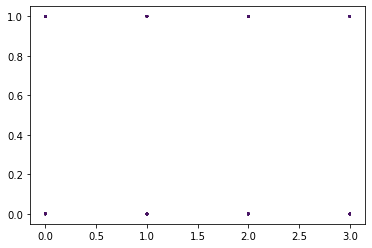

In [22]:
#ScatterPLOT FOR OUTLIAR DETECTION ON TESTING DATA
plt.scatter(b,c,e,f,alpha=1)

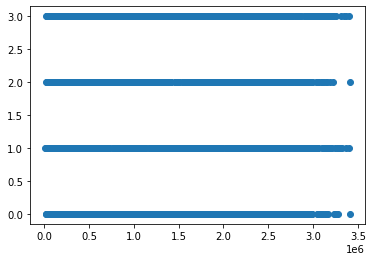

In [23]:
#ScatterPLOT FOR OUTLIAR DETECTION ON TESTING DATA
plt.scatter(a,d,alpha=1)

# NO OUTLIARS DETECTED NO NEED OF REMOVAL

In [24]:
#creating different dataframe for output 
df=pd.DataFrame()
df['Deal_title']=data_test['Deal_title']
df['Success_probability']=df_most_common_imputed['Success_probability']
df

,Deal_title,Success_probability
0,TitleAD16O,73.6
1,TitleOW6CR,58.9
2,TitleVVJQ5,68.8
3,TitleUS8NA,64.5
4,Title5VGWW,62.4
...,...,...
2088,Title2R8VU,72.1
2089,Title7HCNJ,65.2
2090,TitleCD5YZ,65.9
2091,Title8OKXL,74.0


In [25]:
#Applying xgboost as it is too efficient
import xgboost as xgb
xg_reg = xgb.XGBRegressor( learning_rate = 0.101,
                max_depth =4,objective="reg:linear",alpha =1,n_estimators=9)
xg_reg.fit(x_train,y_train)
xgbost= xg_reg.predict(x_test)
df["Success_probability"]=xgbost
df.head()


[10:48:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,Deal_title,Success_probability
0,TitleAD16O,37.080441
1,TitleOW6CR,40.889431
2,TitleVVJQ5,43.583466
3,TitleUS8NA,41.270584
4,Title5VGWW,42.178982


In [26]:
#output CSV
df.to_csv("xg_boost.csv", index=False)